<a href="https://colab.research.google.com/github/pripalazzo/Machine_Learning/blob/main/Desafio_Final_Bootcamp_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
# Importando o pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #plot de gráficos

In [215]:
# Importando o dataset que será analisado
df = pd.read_csv('cars.csv', sep = ',')
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [216]:
df.shape

(261, 8)

In [217]:
df['eficiencia'] = np.where(df['mpg']>=25, 'eficiente', 'não eficiente')
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,eficiencia
0,14.0,8,350,165,4209,12,1972,US.,não eficiente
1,31.9,4,89,71,1925,14,1980,Europe.,eficiente
2,17.0,8,302,140,3449,11,1971,US.,não eficiente
3,15.0,8,400,150,3761,10,1971,US.,não eficiente
4,30.5,4,98,63,2051,17,1978,US.,eficiente


In [218]:
df.groupby('eficiencia')['mpg'].count()


eficiencia
eficiente        103
não eficiente    158
Name: mpg, dtype: int64

In [219]:
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand', 'eficiencia'],
      dtype='object')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
 8   eficiencia   261 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 18.5+ KB


In [221]:
df['cubicinches'] = pd.to_numeric(df['cubicinches'],errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'],errors='coerce')

In [222]:
df.loc[pd.isna(df['cubicinches']), :].index

Int64Index([40, 180], dtype='int64')

In [223]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,eficiencia
0,14.0,8,350.0,165,4209.0,12,1972,US.,não eficiente
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,eficiente
2,17.0,8,302.0,140,3449.0,11,1971,US.,não eficiente
3,15.0,8,400.0,150,3761.0,10,1971,US.,não eficiente
4,30.5,4,98.0,63,2051.0,17,1978,US.,eficiente


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
 8   eficiencia   261 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 18.5+ KB


In [225]:
df['cubicinches'].isnull().sum()

2

In [226]:
df['weightlbs'].isnull().sum()

3

In [227]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
eficiencia     0
dtype: int64

In [229]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [230]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mpg              23.144828
cylinders         5.590038
cubicinches     200.918919
hp              106.360153
weightlbs      3009.833333
time-to-60       15.547893
year           1976.819923
dtype: float64

In [231]:
df['cubicinches'].fillna(value=df['cubicinches'].mean(),inplace=True)
df['weightlbs'].fillna(value=df['weightlbs'].mean(),inplace=True)

In [232]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mpg              23.144828
cylinders         5.590038
cubicinches     200.918919
hp              106.360153
weightlbs      3009.833333
time-to-60       15.547893
year           1976.819923
dtype: float64

In [237]:
df['mpg'].median()

22.0

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
 8   eficiencia   261 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 18.5+ KB


In [294]:
# Preparando os dados para aplicação dos algoritmos

X_normalizacao = df[['mpg',	'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]
y = df['eficiencia']
X.head()

,cylinders,cubicinches,hp,weightlbs,time-to-60
0,8,350.0,165,4209.0,12
1,4,89.0,71,1925.0,14
2,8,302.0,140,3449.0,11
3,8,400.0,150,3761.0,10
4,4,98.0,63,2051.0,17


In [286]:
X_normalizacao.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [240]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cylinders    261 non-null    int64  
 1   cubicinches  261 non-null    float64
 2   hp           261 non-null    int64  
 3   weightlbs    261 non-null    float64
 4   time-to-60   261 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 10.3 KB


In [241]:
y.head()

0    não eficiente
1        eficiente
2    não eficiente
3    não eficiente
4        eficiente
Name: eficiencia, dtype: object

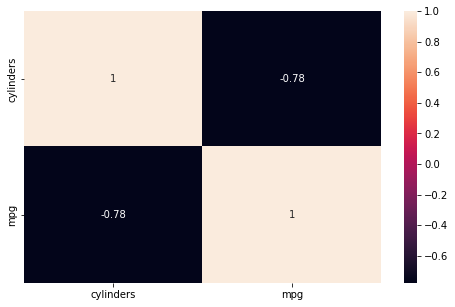

In [242]:
#encontrando a matriz de correlação entre alguns dados
import seaborn as sns
plt.rcParams["figure.figsize"] = [8, 5]

matriz_correlacao=df[['cylinders', 'mpg']].corr()
sns.heatmap(matriz_correlacao, annot=True)  #realiza o plot da matriz de correlação
plt.show()

In [244]:
df[['cylinders', 'mpg']].corr()

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


In [269]:
# Importando o módulo MinMaxScaler do sklearn
from sklearn.preprocessing import StandardScaler

In [287]:
# define min max scaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(X_normalizacao)

In [295]:
pca = PCA(n_components=7)

In [302]:
X_pca = pca.transform(scaled)

In [ ]:
X_pca.explained_variance_ratio_

In [305]:
X_pca[:3]

array([[ 3.48521925,  0.5263255 , -0.13973834,  0.25879154,  0.08690179,
        -0.17920558,  0.07907785],
       [-2.17691231, -0.28542399, -1.3046126 , -0.10046548, -0.28969849,
        -0.04114712, -0.01312739],
       [ 2.6849731 ,  1.04694609, -0.73215552,  0.49822711, -0.53516815,
        -0.07574501,  0.15995575]])

In [ ]:
X_pca.info()

In [252]:
# função que realiza a divisão do dataset
from sklearn.model_selection import train_test_split  

# divide 30% para teste
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.30, random_state = 42)

In [256]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

# Cria o objeto de classificação através do 
df_arvore = DecisionTreeClassifier()

# Realiza o treinamento do classificador
df_arvore = df_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = df_arvore.predict(X_test)

In [258]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

    eficiente       0.84      0.95      0.89        40
não eficiente       0.94      0.82      0.88        39

     accuracy                           0.89        79
    macro avg       0.89      0.89      0.89        79
 weighted avg       0.89      0.89      0.89        79



In [260]:
# importar biblioteca para calculo de métricas
from sklearn import metrics  

# calculando medidas de erro
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('Matriz de Confusão\n',  metrics.confusion_matrix(y_test, y_pred)) 
print('\nAcurácia\n', metrics.accuracy_score(y_test, y_pred)) 

Matriz de Confusão
 [[38  2]
 [ 7 32]]

Acurácia
 0.8860759493670886


In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [263]:
y_RL = logmodel.predict(X_test)

In [264]:
print('Matriz de Confusão\n',  metrics.confusion_matrix(y_test, y_RL)) 
print('\nAcurácia\n', metrics.accuracy_score(y_test, y_RL)) 

Matriz de Confusão
 [[34  6]
 [ 5 34]]

Acurácia
 0.8607594936708861


In [265]:
# importar o modelo de KMeans
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3, random_state = 42)
 
# treinando o modelo no conjunto de dados de treino
clustering.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [266]:
clustering.cluster_centers_

array([[-0.92606915, -0.85150006, -0.68371326, -0.79528527,  0.48741533],
       [ 1.37203324,  1.39398445,  1.37151642,  1.3002168 , -1.01474998],
       [ 0.30266031,  0.18275087, -0.17027435,  0.30414525,  0.44509365]])